In [361]:
import sys
%load_ext autoreload
%autoreload 2

path = '/home/nol/atom_pjs/ai_pro/'
sys.path.insert(0, path)

import absorbing_markov_chain as mc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [362]:
prob_matrix = [
    [0, 1, 0, 0, 0, 1],
    [4, 0, 0, 3, 2, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
]

In [363]:
agent_0 = mc.Agent(prob_matrix)

In [364]:
agent_0._sum_prob(agent_0.current_state)

2

In [365]:
agent_0.choose_state(agent_0._prob_dict(agent_0._sum_prob(agent_0.current_state),prob_matrix))

5

In [366]:
for i in range(0,5):
    print(agent_0.choose_state(agent_0._prob_dict(agent_0._sum_prob(agent_0.current_state),prob_matrix)))

1
1
5
1
1


In [367]:
%time agent_0.main_loop()

CPU times: user 356 ms, sys: 0 ns, total: 356 ms
Wall time: 358 ms


{3: 0.20584252273166956, 4: 0.147030373379764, 5: 0.6471271038885664}

In [368]:
print(3, 3/14, 4, 1/7, 5, 9/14)

3 0.21428571428571427 4 0.14285714285714285 5 0.6428571428571429


In [369]:
agent_0.called

5169

In [370]:
import pandas as pd

col = [3, 4, 5]
index = [0]




results = pd.DataFrame(columns = col, index = index)

for i in range(0, 500):
    results = pd.concat([results, pd.DataFrame(agent_0.main_loop(), index=[0])])
    
    
results.dropna()[:10]

,3,4,5
0,0.208518,0.141896,0.649587
0,0.207021,0.145172,0.647808
0,0.209318,0.145329,0.645353
0,0.211149,0.145187,0.643664
0,0.211933,0.144699,0.643368
0,0.212022,0.145865,0.642113
0,0.211267,0.145696,0.643038
0,0.210458,0.145830,0.643713
0,0.210558,0.145803,0.643639
0,0.211327,0.146260,0.642412


In [371]:
results[3].mean()

0.21389012842014851

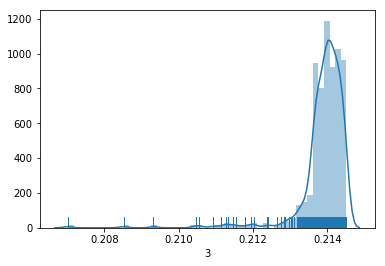

In [372]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()


results = results.dropna()
import seaborn as sns
sns.distplot(results[3], rug=True)


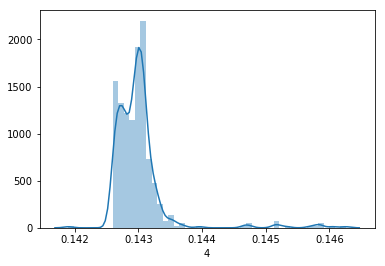

In [373]:
sns.distplot(results[4])

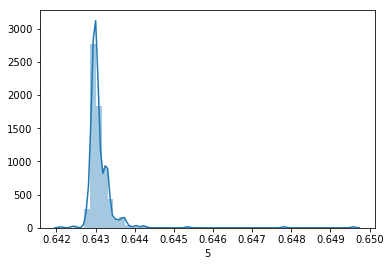

In [374]:
sns.distplot(results[5])

In [375]:
results[3].mean()

0.21389012842014848

In [376]:
results[3].std()

0.00069430444419220285

In [385]:
distri = {'a': .3, 'b': .1, 'c': .6}
agent_0.choose_state(distri)

from collections import defaultdict

a_dict = defaultdict(lambda: 0)

inum = 1000000

for i in range(0, inum):
    key = agent_0.choose_state(distri)
    a_dict[key] += 1
    
n_dict = {}
    
for k, v in a_dict.items():
    n_dict[k] = v / inum
    
n_dict


{'a': 0.299605, 'b': 0.099721, 'c': 0.600674}